# Integrantes do trabalho
- Arthur Vinicius Santos Silva  RA:1903665
- Larissa Ionafa                RA:1903166
- Lucas da Silva Santos         RA:1904201

## Importando as bibliotecas

In [341]:
import pandas as pd
import plotly.express as px
import missingno as msno

## Importando as bases de dados

### Base de dados

Base de dados loja de jogos on-line.

In [342]:
dados = pd.DataFrame(pd.read_csv("../0_bases_originais/original.csv"))

In [343]:
dados

,nome,porcentagem_desconto,preço,tipo
0,DEVIL MAY CRY 5 + VERGIL,-67%,"R$ 29,69",Padrão
1,Batman: Arkham Origins - Season Pass,-85%,"R$ 5,54",DLC
2,Street Fighter 6 - Deluxe Edition,-12%,"R$ 318,55",Pré-Venda
3,Mortal Kombat 11 Ultimate,-80%,"R$ 55,99",Padrão
4,Xbox - Cartão Presente Digital 20 Reais,0,"R$ 20,00",Padrão
...,...,...,...,...
595,Children of Morta: Ancient Spirits,0,"R$ 10,89",DLC
596,Conan Exiles - Architects of Argos Pack,-25%,"R$ 18,74",DLC
597,Destiny 2: Além da Luz,-60%,"R$ 35,99",DLC
598,Crypt of the NecroDancer: AMPLIFIED,0,"R$ 13,99",DLC


In [344]:
# verificando o tamanho da base em linhas e colunas
dados.shape

(600, 4)

## Primeiros tratamentos

### Resetando o index e eliminando os duplicados

In [345]:
dados.index.value_counts()

0      1
394    1
396    1
397    1
398    1
      ..
200    1
201    1
202    1
203    1
599    1
Name: count, Length: 600, dtype: int64

In [346]:
dados.reset_index(drop=True).index.value_counts()

0      1
394    1
396    1
397    1
398    1
      ..
200    1
201    1
202    1
203    1
599    1
Name: count, Length: 600, dtype: int64

In [347]:
dados.duplicated().sum()

0

In [348]:
dados.loc[dados.nome.duplicated()==True]

,nome,porcentagem_desconto,preço,tipo


In [349]:
# criando um novo objeto dados, resetando o index do objeto anterior e eliminando duplicados
dados = dados.reset_index(drop=True).drop_duplicates()
dados.shape

(600, 4)

## Retirando variáveis

No pandas, utilizamos o comando .drop para eliminar as colunas que não pretendemos trabalhar.

In [350]:
#Não será necessário remoção de colunas

## Editando os nomes das colunas

### Nomes das colunas em minusculo

In [351]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preço', 'tipo'], dtype='object')

In [352]:
dados.columns = dados.columns.str.lower()

### Substituindo caracteres especiais das colunas

In [353]:
dados.columns = dados.columns.str.replace('ç', 'c')

In [354]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preco', 'tipo'], dtype='object')

### Substituindo caracteres especiais das linhas de colunas específicas

In [355]:
dados.preco=dados.preco.str.replace('\W','')
dados.preco=dados.preco.str.replace('R','')
dados.preco=dados.preco.str.replace("$","")
dados.preco=dados.preco.str.replace(",",".")

### Substituindo caracteres especiais de toda a base de dados

In [356]:
dados = dados.replace({'á':'a','ã':'a', 'â':'a', 'í':'i',
                ':' : '',
                '-' : '',
                "’" : "",
                "'" : "",
                "/" : "",
                "%" : "",
                'ÅŸ':'s',
                'Ä°':'I',
                'Ä±':'i',
                'Ã¶':'o',
                'Ã§':'c',
                'ÄŸ':'g',
                'Ã¼':'u',
                'Ã©':'e',
                'Ã¡':'a',
                'Ã³':'o',
                'Ã±':'nh',
                '&':'',
                'Ã…Ë†':'n',
                'Ã§':'c',
                'Ã­':'i',
                'Ã£':'a',
                'Ãº':'u',
                'Ã':'a',
                'Ãª':'e',
                'Ã‘':'N',
                'aÂ¢':'a',
                'aÂª':'e',
                'aÂ':'a',
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "aª":"e",
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",
              }, regex=True)

## Convertendo preços para númerico

In [357]:
dados.preco = pd.to_numeric(dados.preco, errors='coerce')

## Dados Missing

<Axes: >

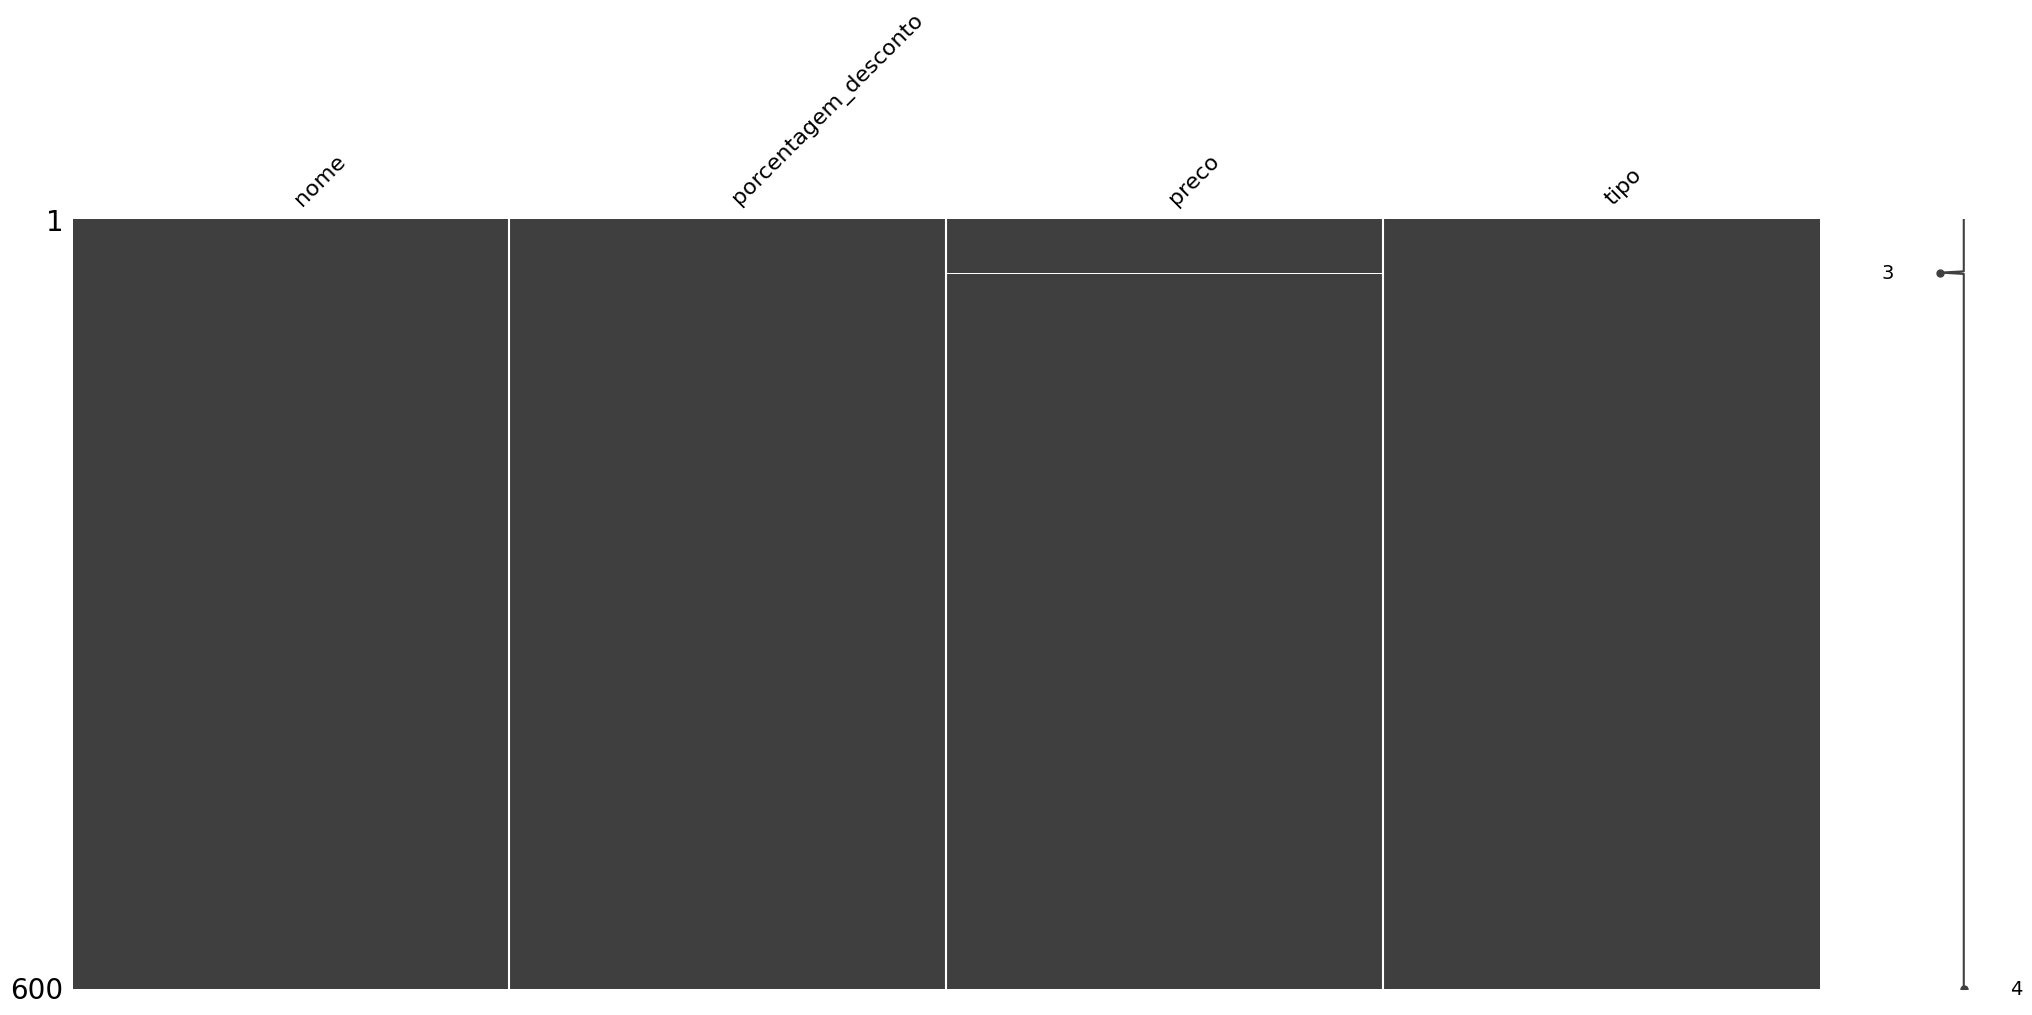

In [358]:
msno.matrix(dados)

<Axes: >

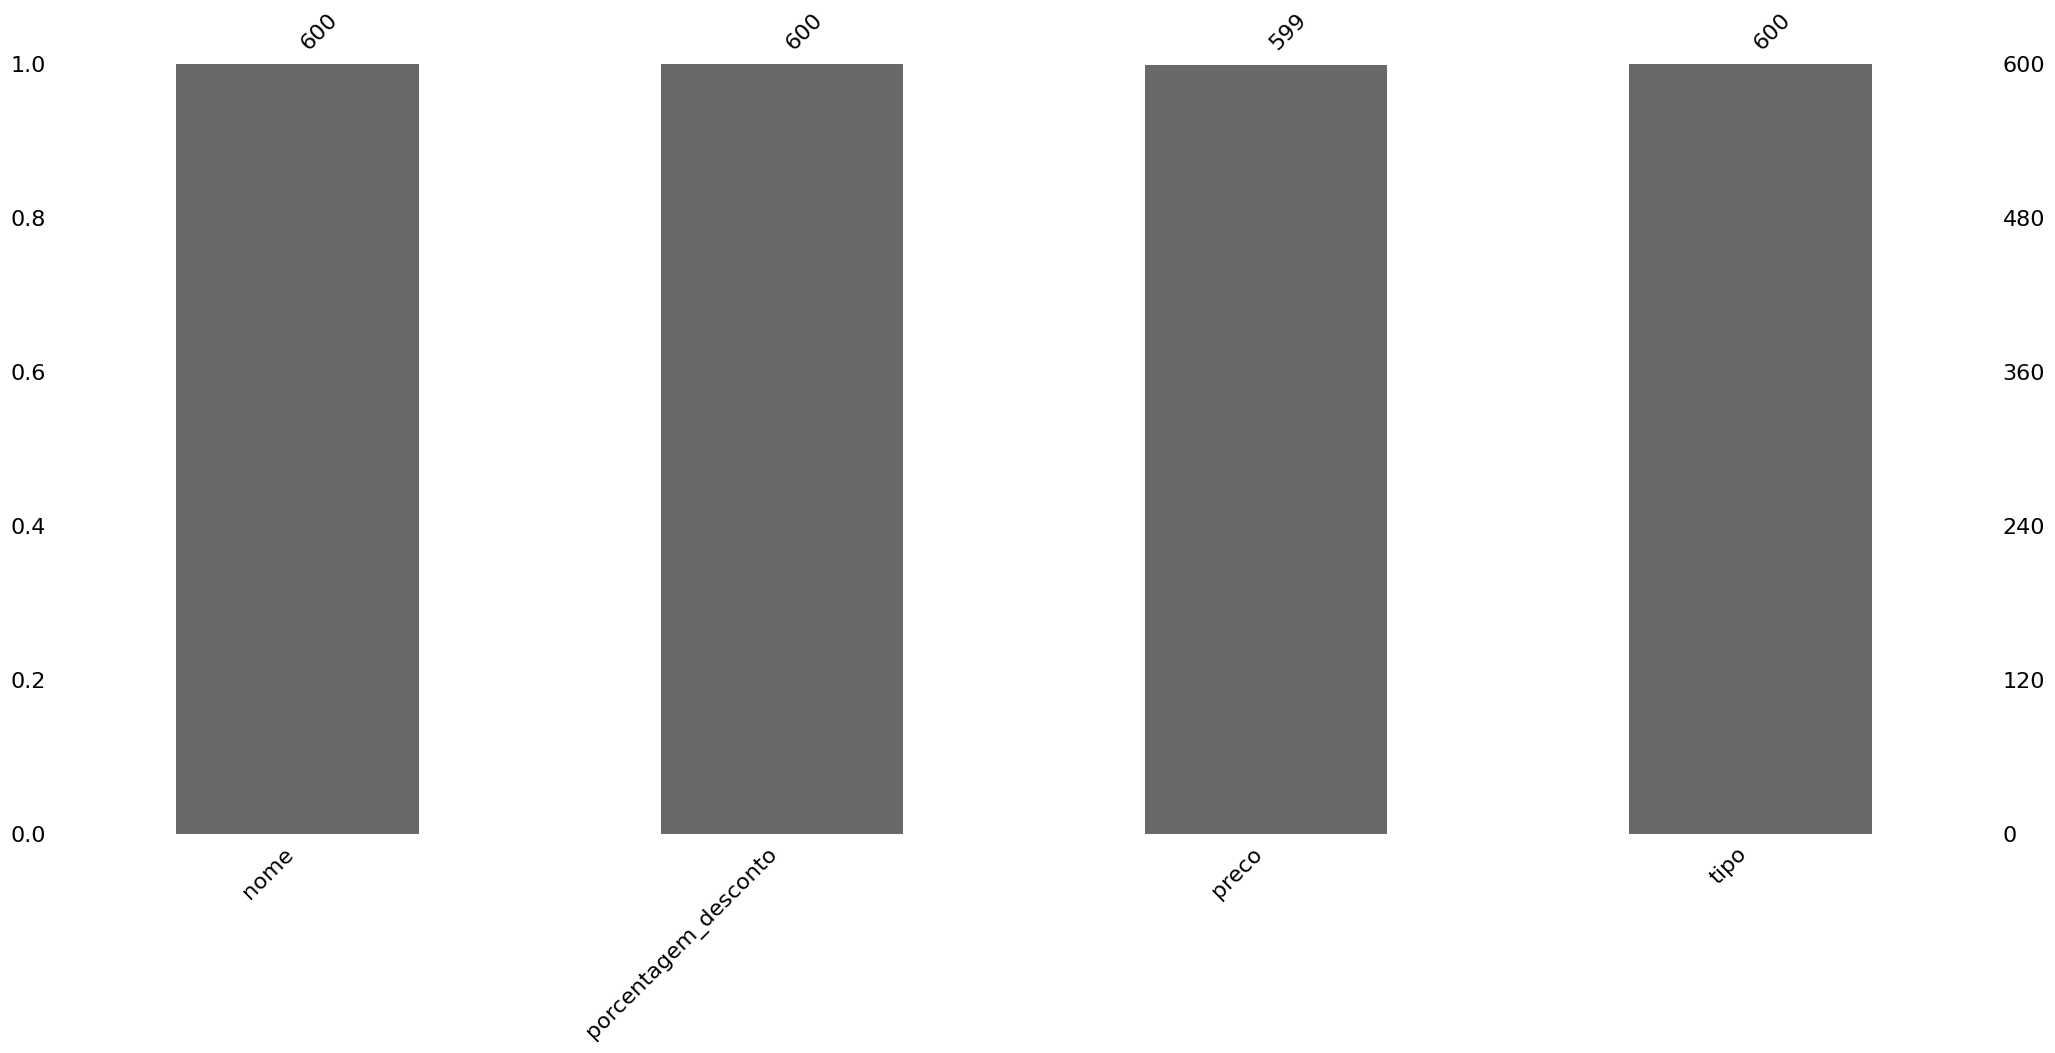

In [359]:
msno.bar(dados)

## Justificativa da remoção de dados nulos
Em análise dos dados, entendemos que os itens que retornaram indisponíveis da raspagem de dados, não fariam sentido serem expostos ou estarem contidos na base tratada.

In [360]:
dados

,nome,porcentagem_desconto,preco,tipo
0,DEVIL MAY CRY 5 + VERGIL,67,29.69,Padrao
1,Batman Arkham Origins Season Pass,85,5.54,DLC
2,Street Fighter 6 Deluxe Edition,12,318.55,PreVenda
3,Mortal Kombat 11 Ultimate,80,55.99,Padrao
4,Xbox Cartao Presente Digital 20 Reais,0,20.00,Padrao
...,...,...,...,...
595,Children of Morta Ancient Spirits,0,10.89,DLC
596,Conan Exiles Architects of Argos Pack,25,18.74,DLC
597,Destiny 2 Alem da Luz,60,35.99,DLC
598,Crypt of the NecroDancer AMPLIFIED,0,13.99,DLC


In [361]:
dados = dados.dropna()
dados.isna().sum()

nome                    0
porcentagem_desconto    0
preco                   0
tipo                    0
dtype: int64

### Resetando index

In [362]:
dados = dados.reset_index(drop=True)
dados

,nome,porcentagem_desconto,preco,tipo
0,DEVIL MAY CRY 5 + VERGIL,67,29.69,Padrao
1,Batman Arkham Origins Season Pass,85,5.54,DLC
2,Street Fighter 6 Deluxe Edition,12,318.55,PreVenda
3,Mortal Kombat 11 Ultimate,80,55.99,Padrao
4,Xbox Cartao Presente Digital 20 Reais,0,20.00,Padrao
...,...,...,...,...
594,Children of Morta Ancient Spirits,0,10.89,DLC
595,Conan Exiles Architects of Argos Pack,25,18.74,DLC
596,Destiny 2 Alem da Luz,60,35.99,DLC
597,Crypt of the NecroDancer AMPLIFIED,0,13.99,DLC


## Tranformando texto para lower case e criando padrão de uso

In [363]:
dados.nome = dados.nome.str.lower()
dados.tipo = dados.tipo.str.lower()
dados

,nome,porcentagem_desconto,preco,tipo
0,devil may cry 5 + vergil,67,29.69,padrao
1,batman arkham origins season pass,85,5.54,dlc
2,street fighter 6 deluxe edition,12,318.55,prevenda
3,mortal kombat 11 ultimate,80,55.99,padrao
4,xbox cartao presente digital 20 reais,0,20.00,padrao
...,...,...,...,...
594,children of morta ancient spirits,0,10.89,dlc
595,conan exiles architects of argos pack,25,18.74,dlc
596,destiny 2 alem da luz,60,35.99,dlc
597,crypt of the necrodancer amplified,0,13.99,dlc


## Tratamento de Outlier

Ao realizar análise dos outlier da base, verificamos que apesar de fora do desvio padrão, estes dados não deveriam ser descartados, uma vez que representam o valor real do item.

In [364]:
px.box(dados.preco)

## Salvar base de dados tratadas

In [365]:
dados.to_csv("../1_bases_tratadas/base_tratada.csv", index=True)

# AC5 - Salvando dados no Banco de dados SQLite3

## Criando database a partir de dataframe tratado

In [366]:
import sqlalchemy as db
from sqlalchemy import create_engine, ForeignKey
from sqlalchemy import Column, Date, Integer, String
from sqlalchemy.ext.declarative import declarative_base


In [367]:
engine = create_engine('sqlite:///nuuvem.db', echo=True)

In [368]:
conn = engine.connect()

In [369]:
metadata = db.MetaData()

In [370]:
dados

,nome,porcentagem_desconto,preco,tipo
0,devil may cry 5 + vergil,67,29.69,padrao
1,batman arkham origins season pass,85,5.54,dlc
2,street fighter 6 deluxe edition,12,318.55,prevenda
3,mortal kombat 11 ultimate,80,55.99,padrao
4,xbox cartao presente digital 20 reais,0,20.00,padrao
...,...,...,...,...
594,children of morta ancient spirits,0,10.89,dlc
595,conan exiles architects of argos pack,25,18.74,dlc
596,destiny 2 alem da luz,60,35.99,dlc
597,crypt of the necrodancer amplified,0,13.99,dlc


In [371]:
dados.to_sql(con=engine, name='jogos_nuuvem', if_exists='replace', index=False)

2023-05-25 23:11:27,645 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-05-25 23:11:27,647 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("jogos_nuuvem")
2023-05-25 23:11:27,647 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-25 23:11:27,648 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("jogos_nuuvem")
2023-05-25 23:11:27,648 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-25 23:11:27,649 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-05-25 23:11:27,649 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-25 23:11:27,649 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("jogos_nuuvem")
2023-05-25 23:11:27,650 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-25 23:11:27,650 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-05-25 23:11:27,650 INFO sqlalchemy.engine.Engine [raw sql] ('jogos_nuuvem',)
2

599

## Realizando select na base criada

In [372]:
query = 'SELECT * FROM jogos_nuuvem'
output = conn.execute(query)
print(output.fetchall())

2023-05-25 23:11:27,701 INFO sqlalchemy.engine.Engine SELECT * FROM jogos_nuuvem
2023-05-25 23:11:27,702 INFO sqlalchemy.engine.Engine [raw sql] ()
[('devil may cry 5 + vergil', '67', 29.69, 'padrao'), ('batman arkham origins  season pass', '85', 5.54, 'dlc'), ('street fighter 6  deluxe edition', '12', 318.55, 'prevenda'), ('mortal kombat 11 ultimate', '80', 55.99, 'padrao'), ('xbox  cartao presente digital 20 reais', '0', 20.0, 'padrao'), ('back 4 blood', '85', 41.99, 'padrao'), ('bully scholarship edition', '0', 39.99, 'padrao'), ('tom clancys the division 2  warlords of new york expansion', '85', 13.49, 'dlc'), ('mortal kombat 1  premium edition', '14', 386.9, 'prevenda'), ('xbox  cartao presente digital 70 reais', '0', 70.0, 'padrao'), ('lego batman 3 beyond gotham  premium edition', '94', 8.0, 'padrao'), ('euro truck simulator', '0', 10.49, 'padrao'), ('devil may cry hd collection', '67', 23.09, 'padrao'), ('castlevania lords of shadow 2  revelations', '0', 15.99, 'dlc'), ('tom cl

In [373]:
DBNuuvem = db.Table('jogos_nuuvem', metadata, autoload=True, autoload_with=engine)
query = db.select([DBNuuvem])
result = conn.execute(query)
print(result.fetchall())

2023-05-25 23:11:30,203 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("jogos_nuuvem")
2023-05-25 23:11:30,204 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-25 23:11:30,206 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-05-25 23:11:30,207 INFO sqlalchemy.engine.Engine [raw sql] ('jogos_nuuvem',)
2023-05-25 23:11:30,208 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("jogos_nuuvem")
2023-05-25 23:11:30,209 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-25 23:11:30,210 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("jogos_nuuvem")
2023-05-25 23:11:30,211 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-05-25 23:11:30,212 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-05-25 23:11:30,212 INFO sqlalchemy.engine.Engine [raw sql] (